In [1]:
# 출력이 너무 길어지지 않게하기 위해 찍지 않도록 했으나 
# 실제 학습 할 때는 아래 두 줄을 주석처리 하는 것을 권장한다.
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
print(pd.__version__)
print(np.__version__)
# pandas 에서 데이터 뽑고, 말뭉치를 뽑아보면 통으로 분석 못 하니까 형태소로 나누는데 나눈 거 중에
#의미 있는 게 서술어, 나 콜라 먹었다.
#뽑아 내는 거 - wordcloud, konlpy



1.1.1
1.18.5


In [3]:
# pandas 설정: 모든 row와 모든 column을 출력하게 하고, 각 column 별 출력되는 글자수는 50자 이내 글자수를 50개로 두고, head tail
pd.set_option('display.max_rows', None, 'display.max_columns', None, 'display.max_colwidth', 50)

In [4]:
# 위의 설정으로 간단하게 보는 df_specific
df_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_specific_wrangle.csv", encoding="utf-8")
df_specific.head(3)

,대학코드,대학명,gen_info,env_info,food_info,study_info,office_info,facil_info,mhct_info,help_info,etc_info
0,AR000004,Universidad del Salvador,아르헨티나의 대다수 대학교는 한국처럼 캠퍼스가 있는 것이 아니라 도시 내에 몇개의 ...,대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다. 하지만 남녀를 불문하고 부에...,기숙사는 학교에서 제공하지 않고 두가지 옵션이 주어진다. 홈스테이 혹은 게스트 하우...,아르헨티나에서의 대학 수업은 주로 오전 혹은 저녁에 있다. 대부분의 학생들이 일을하...,EL SALVADOR대학교는 국제 교육부가 잘 되있는 학교이다. 아르헨티나 대학교들...,부대시설로는 헬스장이 있다고 알고 있으나 시내와 먼 곳에 있었다. 동아리는 몇가지 ...,딱히 컬쳐쇼크를 받을 만 한 요소는 없었던 것 같다. 하지만 처음에 언어적인 면에서...,"살바도르 대학교 국제처에서 비자문제나 숙소문제(홈스테이경우) 등은 해결해 주고, 특...",NaN
1,AU000019,Australian National University,"ANU has a very big campus, but unlike Yonsei, ...","The city center, called CIVIC, is 20min walk a...","There are many housing options, but I chose to...","In my personal opinions, classes are generally...","Overall, I did not have to ask for help much f...","There were many clubs for you to join at ANU, ...",I did have some culture shock during my first ...,"I was helped a lot, especially during the firs...","Overall, my stay in Australia has been nothing..."
2,AU000001,Bond University,"Bond대학교는 휴양지로 유명한 골드코스트에 위치해있습니다. 서퍼스 파라다이스, 브...",학교 주변은 조용하고 깨끗한 평화로운 전원마을의 느낌입니다. 학교에서 5분정도 걸어...,거주형태는 크게 On Campus와 Off Campus로 나뉩니다. 저는 기숙사에 ...,"수업은 보통 4개의 수업을 듣습니다. 저는 Chinese1, Australian p...",교환생활 중 국제교육부와 연락할 일은 없었습니다. 교환학생을 가서 따로 국제교육부와...,학기초에 동아리 박람회식으로 여러 동아리들의 부스가 세워집니다. 관심 있는 동아리에...,특별히 culture shock이라기 보다는 정말 다양한 문화를 접하는 것 자체가 ...,"수업관련해서는 교수님께 질문을 해도 친절하게 알려주시고, 또 교내에 과제나 발표준비...",Bond와 그 동네를 생각하면 여유롭고 평화로웠던 분위기가 아직도 생생해요. 여기서...


In [5]:
df_ranking_specific = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_wrangled.csv", encoding="utf-8")
df_ranking_specific.head(7)

,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,AF000001,AFGHANISTAN,Kabul University,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,AR000001,ARGENTINA,Universidad Blas Pascal,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,AR000002,ARGENTINA,Universidad Catolica de Cordoba,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,AR000003,ARGENTINA,Universidad de Palermo,교환학생,ISEP,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4,AR000004,ARGENTINA,Universidad del Salvador,교환학생,ISEP,1.0,0.0,0.399670,0.00000,0.399670,0.119901,http://oia.yonsei.ac.kr/partner/expReport.asp?...
5,AR000005,ARGENTINA,University of Buenos Aires,교환학생,교환대학,NaN,NaN,NaN,NaN,NaN,NaN,http://oia.yonsei.ac.kr/partner/expReport.asp?...
6,AU000019,AUSTRALIA,Australian National University,교환학생,교환대학,27.0,17.0,17.952732,0.62963,0.664916,0.640216,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [6]:
df_ranking = pd.read_csv("/Users/jupiter/Desktop/Exchange_proj/df_univ_ranking.csv", encoding="utf-8")
df_ranking.head(5)

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
0,376,CH000004,SWITZERLAND,University of Lausanne,교환학생,교환대학ISEP,8.0,8.0,6.659102,1.000000,0.832388,0.949716,http://oia.yonsei.ac.kr/partner/expReport.asp?...
1,284,MX000004,MEXICO,Instituto Tecnologico y de Estudios Superiores...,교환학생,교환대학ISEP,7.0,7.0,5.665700,1.000000,0.809386,0.942816,http://oia.yonsei.ac.kr/partner/expReport.asp?...
2,415,GB000010,UNITED KINGDOM,University of Edinburgh,교환학생방문학생SAP(정규),교환대학SAF,7.0,7.0,5.607286,1.000000,0.801041,0.940312,http://oia.yonsei.ac.kr/partner/expReport.asp?...
3,361,SE000003,SWEDEN,Kristianstad University,교환학생,교환대학,49.0,47.0,39.341540,0.959184,0.802889,0.912295,http://oia.yonsei.ac.kr/partner/expReport.asp?...
4,49,CA000003,CANADA,Dalhousie University,교환학생,교환대학,6.0,6.0,4.088647,1.000000,0.681441,0.904432,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [7]:
df_ranking['국가'].value_counts()

UNITED STATES         116
JAPAN                  23
CANADA                 17
NETHERLANDS            14
UNITED KINGDOM         13
AUSTRALIA              13
FRANCE                 12
GERMANY                11
CHINA                  10
SPAIN                   7
SWEDEN                  6
AUSTRIA                 6
ITALY                   5
NEW ZEALAND             5
HONG KONG               5
FINLAND                 4
TAIWAN                  4
SWITZERLAND             3
SINGAPORE               3
RUSSIAN FEDERATION      3
IRELAND                 2
NORWAY                  2
THAILAND                2
DENMARK                 2
LITHUANIA               1
TURKEY                  1
ISRAEL                  1
MEXICO                  1
CZECH REPUBLIC          1
POLAND                  1
BELGIUM                 1
Name: 국가, dtype: int64

In [8]:
df_ranking.shape

(295, 13)

In [9]:
sample_index=0

In [10]:
sample_univ = df_ranking.loc[sample_index, '대학명']
sample_univ

'University of Lausanne'

In [11]:
sample_univ = df_ranking.loc[sample_index, '국가']
sample_univ

'SWITZERLAND'

In [12]:
df_ranking.loc[(df_ranking['국가'] == 'MEXICO')]

,index,대학코드,국가,대학명,파견구분,협정형태,NUM_VISITS,BERT_SUM,RNN_SUM,BERT_AVG,RNN_AVG,BERT_PLUS_RNN_SCORE,COLLEGE_LINK
1,284,MX000004,MEXICO,Instituto Tecnologico y de Estudios Superiores...,교환학생,교환대학ISEP,7.0,7.0,5.6657,1.0,0.809386,0.942816,http://oia.yonsei.ac.kr/partner/expReport.asp?...


In [13]:
df_ranking_sw = df_ranking.loc[(df_ranking['국가'] == 'SWITZERLAND')]
print(df_ranking_sw.shape)

(3, 13)


In [14]:
df_ranking.columns.to_list()

['index',
 '대학코드',
 '국가',
 '대학명',
 '파견구분',
 '협정형태',
 'NUM_VISITS',
 'BERT_SUM',
 'RNN_SUM',
 'BERT_AVG',
 'RNN_AVG',
 'BERT_PLUS_RNN_SCORE',
 'COLLEGE_LINK']

In [15]:
df_specific.shape #specific은 왜? 제목은 abstract, specific 은 말뭉치. shape은 대학의 개수.

(470, 11)

In [16]:
# pandas 설정: 각 column 별 (혹은 한 cell에서) 출력되는 글자수 제한을 없애기
pd.set_option('display.max_colwidth', None)

In [17]:
df_specific.isnull().sum()

대학코드            0
대학명             0
gen_info        0
env_info        1
food_info       2
study_info      0
office_info     8
facil_info      3
mhct_info      15
help_info      17
etc_info       16
dtype: int64

In [18]:
df_column = df_specific.fillna("")
df_column.head()

대학코드                              대학명  \
0  AR000004         Universidad del Salvador   
1  AU000019   Australian National University   
2  AU000001                  Bond University   
3  AU000002                Curtin University   
4  AU000003  Curtin University of Technology   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [19]:
df_column.isnull().sum()

대학코드           0
대학명            0
gen_info       0
env_info       0
food_info      0
study_info     0
office_info    0
facil_info     0
mhct_info      0
help_info      0
etc_info       0
dtype: int64

In [11]:
import re
# removing junks from the string data
def remove_junk(str_data):
    str_data = str_data.replace("\\\\n", "") #slash n 이 엔터, 쓸데 없는 걸 없애는 거
    str_data = str_data.replace("\\n", "")
    str_data = str_data.replace("\n", "")
    str_data = str_data.replace("\\", "")
    str_data = str_data.replace("\\t", "")
    str_data = str_data.replace("NaN", "")

    # 한글, -english 빼고 전부 날리기
    # regex, regular expression, 특정 글자수 규칙 지정, 말고는 다 날림
    str_data = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z]', ' ', str_data)
    # replace multiple spaces into single space
    str_data = ' '.join(str_data.split()) #멀티플 스페이스를 싱글로 바꿈
    return str_data

In [12]:
env_data = "env_info" #변수로 저장. 그래야 한 environment info를 제너럴로 바꿀 수 있음
univ_code = "MX000004"

In [13]:
def access_univ_info(dataframe, column, univ_code):
    df_row = dataframe.loc[dataframe["대학코드"] == univ_code]
    str_univ_info = df_row[column].to_string(index=False).lstrip()
    str_univ_info = remove_junk(str_univ_info)
    return str_univ_info 

In [14]:
str_example = access_univ_info(df_specific, env_data, univ_code)
str_example[:500] #뭔가 많이 잘못됨; BERT score왜 이렇게 나온 것인지 조사 필요함- sentiment analysis 성능평가. NUM_Visits only 7.

'일단 저는 전반적으로 멕시코가 제 최고의 나라로 뽑히게 되었지만 몬테레이 주는 별로'

In [22]:
# collecting all column values into one string 여러개의 카테고리별 후기를 하나로 대학으로
def column_to_string(dataframe, column_name: str):
    str_corpus = dataframe[column_name].to_string(index=False).lstrip()
    str_corpus = remove_junk(str_corpus)
    return str_corpus

In [23]:
# collecting all column values into one string
env_corpus = column_to_string(df_specific, env_data)
print("글자수:", len(env_corpus))
env_corpus[:1000]

글자수: 21170


'대학교가 도시 여러곳에 분포하고 있으므로 각기 다르다 하지만 남녀를 불문하고 부에 The city center called CIVIC is min walk a 학교 주변은 조용하고 깨끗한 평화로운 전원마을의 느낌입니다 학교에서 분정도 걸어 학교주변에는 큰 마트가 개있고 거기에 미용실 약국 아시안마트 등의 편의시설이 있다 커튼 주변에는 waterford plaza를 제외하고 별다른 것이 없습니다 그러나 디킨대학교 주변에는 크게 뭐가 없지만 장을 보러 나가실 때는 박스힐 스테이션으로 캠퍼스가 교외에 있어서 시내로 가려면 신촌에서 강남가는 체감 거리로 트램을 타야 합 주변은 대부분 외곽 거주지역으로 이루어져있고 여행이나 쇼핑은 대중교통을 이용하여 매주 수요일마다 Students Night 이라 불리는 Party가 학교에서 도 앞서 말씀드렸듯이 학교에서 가장 가까운 역은 Glenferrie 역이고 Glenf 애들레이드는 도시 크기 대비 인구가 매우 적기 때문에 한적한 느낌이 들고 여유롭습니 대학교에서 가장 가까웠던 곳들은 Randwick 와 Kingsford 이었습니다 대학 주변에는 놀 곳이 많지는 않습니다 하지만 대학교 안 곳곳에 카페와 식당이 많 브리스번의 날씨는 한마디로 환상적이라고 할 수 있다 내가 브리스번에 머물렀던 기간 Although there is not much to do or see in ter Many Asian students thanks to China Town fre 학교는 작지만 쿠프슈타인이라는 작은 마을의 중심부에 위치해 있으며 마을의 각종 크고 아무래도 시내에서 조금 떨어진 곳에 있다 보니 학교 주변에 많은 것들이 있지는 않지 그라츠는 오스트리아에서 두번째로 큰 도시지만 우리나라 도시들처럼 번화하지는 않아요 Stadtplatz 라는 메인 스트릿이 있다 하지만 메인 스트릿이라고 해봤자 거창 학교 주변에는 대학 건물과 기숙사 외에는 공장 건물과 마트들 뿐입니다 약간 휄하다 구 Uni Campus 내에는 Billa라는 마트가 있고 바로 길 

## Tokenizing with soynlp

In [24]:
# https://github.com/lovit/soynlp 문장을 쪼개는 방식. 쪼개진 거의 예시가 
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [25]:
tokenized_env = tokenizer.tokenize(gen_corpus)
tokenized_env[:30]

['대학교가',
 '도시',
 '여러곳에',
 '분포하고',
 '있으므로',
 '각기',
 '다르다',
 '하지만',
 '남녀를',
 '불문하고',
 '부에',
 'The',
 'city',
 'center',
 'called',
 'CIVIC',
 'is',
 'min',
 'walk',
 'a',
 '학교',
 '주변은',
 '조용하고',
 '깨끗한',
 '평화로운',
 '전원마을의',
 '느낌입니다',
 '학교에서',
 '분정도',
 '걸어']

In [26]:
from collections import Counter

In [27]:
print(len(tokenized_env)) 

5230


In [28]:
tokenized_env_counted = Counter(tokenized_env)
print("no. gen words:", len(tokenized_env_counted))
common_env_words = tokenized_env_counted.most_common(10)
common_env_words

no. gen words: 2716


[('학교', 91),
 ('대학', 66),
 ('있습니다', 45),
 ('주변에', 41),
 ('주변에는', 38),
 ('있는', 38),
 ('수', 33),
 ('분', 33),
 ('작은', 32),
 ('때문에', 26)]

In [40]:
stopwords_kr = ['으로', '에서', '있는', '하는', '하고', '있습니다', '그리고','편입니다','아주','곳에','않습니다','좋습니다','않았습니다',
                '입니다', '어느', '하는데', '대체', '있으면', '최근', '좋은','은','있는데','주로',
                '라고', '봅니다', '해야', '있다고', '이라는', '합니다', '조금','굉장히','있으며','것이','갈','자주',
                '경우', '가능한', '하지만', '또한', '처럼', '있어', '보다', '꽤', '상당히',
                '되어', '이미', '그러나', '이루어지고', '이라', '위해', '되면', '와','를', '가지고',
                '이런', '까지', '하여', '우리', '어떤', '에게', '있지만', '해주는', '바로', '내내', '것을', '크게',
                '정도', '또는', '부터', '대해', '모든', '하기', '어떻게', '같습니다', 
                '이라고', '에는', '때문', '되고', '됩니다', '통해', '있을', '결국', '않은','훨씬','같아요','정도의','같습니다','버스를',
                '이를', '특히', '있도록', '대한', '가장', '이나', '에서는', '있고', 
                '같은', '에서도', '아닌', '다른', '따라', '되어야', '한다고', '다만', '볼','도','다'
                '이러한','해서', '관련', '생각', '하지', '않을까요', '약간', '되는', 
                '에선', '라는', '물론', '않을까', '하면', '아니라', '말씀', '에도', 
                '아니라', '부분', '분야', '많은', '여러', '향후', '기반', '행차', '할', '있어서',
                '그러면서', '되지만', '현재', '제가', '저는', '너무', '작은','ity','의','거의','정도로',
                '정말','그들','여타','없으므','완전','몇몇','만약','게다','이후','우선',
                '시쯤','후반','더욱','원하는','많을','몇개','분명','두어개', '하므', '수밖',
                '이','있','하','것','들','되','수','이','보','않','없','나','사람','주','아니','등','같',
                '우리','때','년','가','한','지','대하','오','말','일','그렇','위하','때문','그',
                '그것','두','말하','알','받','못하','일','에','4','10','5', '8','6','9','7','nn','대부분', '오는','꼭'
                '그런','또','문제','더','사회', '는','많이','n','1','2','3','있다','분',
                '많','좋','크','따르','중','나오','가지','씨','시키','만들','지금','생각하','내가','비교적',
                '그러','속','하나','살','모르','적','월','데','자신','안','어떤','내','경우',
                '명','그녀','다시','이런','앞','보이','번','다른','어떻','여자','개','전','들',
                '주변에는','없습니다','다','t','앞서','곳이','타고','있기','많고','곳은','자체가','학','약','없다',
                '사실','이렇','점','싶','말','정도','좀','원','잘','통하','소리','놓','큰','매우','때문에'] 

In [65]:
stops = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_kr.txt', encoding='utf').read()

In [66]:
kr = open('/Users/jupiter/Desktop/Exchange_proj/stopwords_nogada.txt', encoding='utf').read()

In [67]:
stops_ = stops + kr

In [68]:
keywords = []
for n in tokenized_gen: 
    if n not in stops_: 
        keywords.append(n)

In [41]:
keywords = []
for n in tokenized_gen: 
    if n not in stopwords_kr: 
        keywords.append(n)

In [69]:
common_keywords = Counter(keywords)
common_key_words = common_keywords.most_common(50)
common_key_words

[('주변에', 41),
 ('주변에는', 38),
 ('캠퍼스', 22),
 ('주변', 22),
 ('주변은', 19),
 ('위치해', 18),
 ('학교가', 16),
 ('마트', 13),
 ('걸어서', 13),
 ('위치하고', 12),
 ('t', 12),
 ('캠퍼스가', 11),
 ('앞서', 11),
 ('가까운', 11),
 ('대학교', 10),
 ('거리에', 10),
 ('캠퍼스는', 10),
 ('식당', 10),
 ('근처에', 10),
 ('중심으로', 10),
 ('대학은', 9),
 ('환경은', 9),
 ('차가', 9),
 ('학교는', 8),
 ('옆에', 8),
 ('버스를', 8),
 ('도시가', 8),
 ('앞에', 8),
 ('도시입니다', 8),
 ('근처', 8),
 ('음식점', 8),
 ('자체가', 8),
 ('카페', 8),
 ('기숙사와', 7),
 ('떨어져', 7),
 ('조용한', 7),
 ('is', 6),
 ('조용하고', 6),
 ('분정도', 6),
 ('식당이', 6),
 ('대학교는', 6),
 ('비교적', 6),
 ('대학이', 6),
 ('지하철', 6),
 ('상점', 6),
 ('시내', 6),
 ('건물들이', 6),
 ('시내에', 6),
 ('도보로', 6),
 ('Univers', 6)]

In [70]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 워드클라우드를 위한 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# 워드클라우드를 위한 나눔고딕 경로 설정
import matplotlib.font_manager as fm
fontpath = './font/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [71]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
backgroundcolor = "white"
width=800
height=600
wordcloud = WordCloud(font_path = fontpath, colormap = 'Blues',
                        stopwords = set(stopwords_kr), 
                        background_color = backgroundcolor, 
                        max_words= 200,
                        max_font_size= 150,
                        width = width, 
                        height = height)

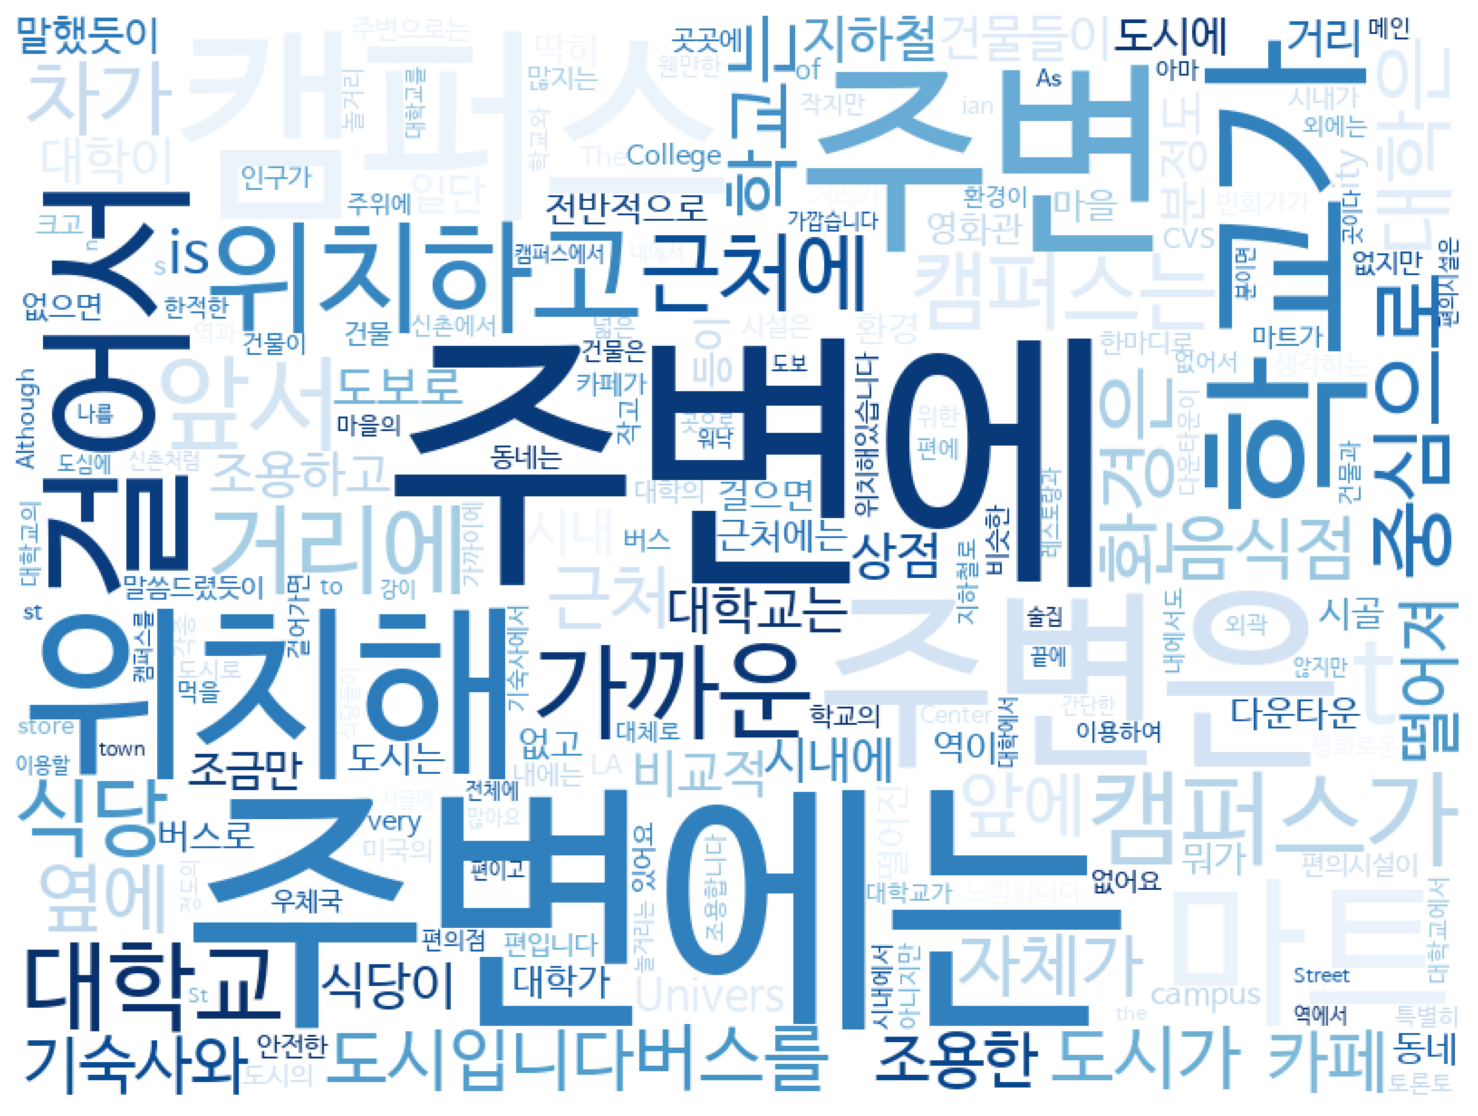

In [73]:
wordcloud.generate_from_frequencies(frequencies = common_keywords) # mecab으로 추출한 명사로 워드클라우드를 그린다.
plt.figure(figsize = (15 , 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#이래서 전체 스탑워드 뽑은 다음에 각 학교에서 유니크한 거만 정리하는 식으로 하는 거..? 
#아니면 그냥 좋은 거에 대한 대학 0이랑 1 나눠서 그 대학들 키워드만 모아서 알아보기 그 때 그 때 스탑워드 처리.

In [53]:
word_list, frequency_list = map(list, zip(*common_gen_words))
word_list[:10]

['있습니다', '수', '있는', '때문에', '는', '많이', '매우', '학교', '큰', '분']

In [47]:
# https://github.com/lovit/soynlp
from soynlp.noun import LRNounExtractor

In [48]:
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(keywords)

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (387, 226) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 58 nouns are extracted


In [59]:
nouns_counted = Counter(nouns)
print("no. gen words:", len(nouns_counted))
common_nouns = nouns_counted.most_common(100)
common_nouns #왜 숫자가 적고 정확도는 높은지 #fillna 해버려서?

no. gen words: 58


[('학교',
  NounScore_v1(frequency=140, score=0.7192192978723405, known_r_ratio=0.9591836734693877)),
 ('대학',
  NounScore_v1(frequency=130, score=0.500998129032258, known_r_ratio=0.484375)),
 ('주변',
  NounScore_v1(frequency=96, score=0.5758527916666667, known_r_ratio=0.972972972972973)),
 ('도시',
  NounScore_v1(frequency=61, score=0.8981951851851852, known_r_ratio=0.75)),
 ('위치',
  NounScore_v1(frequency=57, score=0.996608203703704, known_r_ratio=1.0)),
 ('시내',
  NounScore_v1(frequency=28, score=0.9859656666666669, known_r_ratio=0.9545454545454546)),
 ('근처',
  NounScore_v1(frequency=28, score=0.9186525999999999, known_r_ratio=1.0)),
 ('식당',
  NounScore_v1(frequency=24, score=0.8388491, known_r_ratio=0.7142857142857143)),
 ('거리',
  NounScore_v1(frequency=24, score=0.8191800555555556, known_r_ratio=1.0)),
 ('기숙사',
  NounScore_v1(frequency=23, score=0.7652077500000002, known_r_ratio=1.0)),
 ('마트',
  NounScore_v1(frequency=22, score=0.55272625, known_r_ratio=0.8888888888888888)),
 ('중심',
  No

In [49]:
noun_extractor.lrgraph.get_r('환경')

[('은', 9), ('', 5), ('이', 3), ('을', 2), ('입니다', 1), ('이라고', 1)]

In [53]:
noun_extractor.lrgraph.get_l('거리')

[('놀', 3), ('분', 1), ('먹', 1)]

In [56]:
from soynlp.noun import LRNounExtractor_v2

noun_extractor = LRNounExtractor_v2(verbose=True)
#noun_extractor.train(sents)
#nouns = noun_extractor.extract()
nouns_eo = noun_extractor.train_extract(keywords)

[Noun Extractor] use default predictors
[Noun Extractor] num features: pos=3929, neg=2321, common=107
[Noun Extractor] counting eojeols
[EojeolCounter] n eojeol = 2546 from 3984 sents. mem=0.219 Gb                    
[Noun Extractor] complete eojeol counter -> lr graph
[Noun Extractor] has been trained. #eojeols=3984, mem=0.224 Gb
[Noun Extractor] batch prediction was completed for 889 words
[Noun Extractor] checked compounds. discovered 16 compounds
[Noun Extractor] postprocessing detaching_features : 314 -> 310
[Noun Extractor] postprocessing ignore_features : 310 -> 301
[Noun Extractor] postprocessing ignore_NJ : 301 -> 299
[Noun Extractor] 299 nouns (16 compounds) with min frequency=1
[Noun Extractor] flushing was done. mem=0.226 Gb                    
[Noun Extractor] 52.71 % eojeols are covered


In [57]:
list(noun_extractor._compounds_components.items())[:50]

[('시골동네', ('시골', '동네')),
 ('거주지역', ('거주', '지역')),
 ('버스정류장', ('버스', '정류장')),
 ('교외지역', ('교외', '지역')),
 ('구성되어', ('구성', '되어')),
 ('학교건물', ('학교', '건물')),
 ('대학건물', ('대학', '건물')),
 ('학교캠퍼스', ('학교', '캠퍼스')),
 ('외곽지역', ('외곽', '지역')),
 ('도시전체', ('도시', '전체')),
 ('우리나라', ('우리', '나라')),
 ('연결되어', ('연결', '되어')),
 ('학교도시', ('학교', '도시')),
 ('강이하나', ('강이', '하나')),
 ('존재하나', ('존재', '하나')),
 ('시내버스', ('시내', '버스'))]

In [60]:
print((nouns['마트'])) 

NounScore_v1(frequency=22, score=0.55272625, known_r_ratio=0.8888888888888888)


In [ ]:
%time df_tokens = df_column.apply(tokenizer.tokenize)